<center>

# Is Bitcoin reliable as an asset ?

</center>


<img src="C:\Users\emeli\Downloads\BTC_image.png" width="100%" align="center">

### Introduction :

In this project, we aim to delve into the historical trends of Bitcoin prices to gain insights into its reliability as an asset. Bitcoin, the pioneering cryptocurrency, has experienced significant fluctuations in value since its inception, attracting widespread attention from investors, traders, and researchers alike. By analyzing its price dynamics over time, we seek to uncover patterns, correlations, and potential predictors that could inform our understanding of its behavior.

For our analysis, we use the BTC dataset sourced from CoinCodex, a platform renowned for real-time tracking of cryptocurrency prices and market capitalizations. The dataset spans from July 17th, 2010, to April 2nd, 2024, providing a comprehensive historical record of Bitcoin's performance. It includes crucial metrics such as opening, high, low, and closing prices, along with trading volume and market capitalization data. This dataset serves as a valuable resource for traders, researchers, and also enthusiasts seeking to explore Bitcoin's price evolution and market dynamics.
Here's the link to the BTC dataset : https://coincodex.com/crypto/bitcoin/historical-data/.

Given the multifaceted nature of our analysis, our problematic revolves around assessing the reliability of Bitcoin as an asset through a comprehensive examination of its historical price data and market dynamics. Through exploration of historical trends, correlations, volatility patterns, and sentiment analysis, coupled with the development of predictive models, we aim to shed light on the factors driving Bitcoin's price fluctuations and ascertain its potential as a viable investment instrument.

### I. Description of our dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
#from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator
#from mplfinance.original_flavor import candlestick_ohlc

In [2]:
df = pd.read_csv('bitcoin_2010-07-17_2024-04-02.csv')
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2010-07-17,2010-07-18,0.0500,0.0500,0.0500,0.0500,0.0,0.0
1,2010-07-18,2010-07-19,0.0858,0.0858,0.0858,0.0858,0.0,0.0
2,2010-07-19,2010-07-20,0.0808,0.0808,0.0808,0.0808,0.0,0.0
3,2010-07-20,2010-07-21,0.0747,0.0747,0.0747,0.0747,0.0,0.0
4,2010-07-21,2010-07-22,0.0792,0.0792,0.0792,0.0792,0.0,0.0


In [3]:
df.shape

(5008, 8)

Our data set has 5008 rows and 8 columns. Each column being : Start, End, Open, Hight, Low, Close, Volume, Market Cap.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       5008 non-null   object 
 1   End         5008 non-null   object 
 2   Open        5008 non-null   float64
 3   High        5008 non-null   float64
 4   Low         5008 non-null   float64
 5   Close       5008 non-null   float64
 6   Volume      5008 non-null   float64
 7   Market Cap  5008 non-null   float64
dtypes: float64(6), object(2)
memory usage: 313.1+ KB


In [5]:
df.isna()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
5003,False,False,False,False,False,False,False,False
5004,False,False,False,False,False,False,False,False
5005,False,False,False,False,False,False,False,False
5006,False,False,False,False,False,False,False,False


In [6]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [7]:
df[['High', 'Volume', 'Market Cap']].describe()

,High,Volume,Market Cap
count,5008.000000,5.008000e+03,5.008000e+03
mean,11149.533226,1.981563e+10,2.043291e+11
std,16415.144560,3.167343e+10,3.065160e+11
min,0.050000,0.000000e+00,0.000000e+00
25%,231.207000,0.000000e+00,3.209305e+09
50%,2246.770000,8.728342e+08,3.493713e+10
75%,16422.258591,3.205649e+10,2.818323e+11
max,73628.430000,2.121515e+11,1.428493e+12


<u>Statistical Analysis</u>

For our analysis, I focused on these three columns to simplify the process.

Between July 17th, 2010, and April 2nd, 2024, approximately 19,816.63 million bitcoins were traded daily, with an average market capitalization of 204.3291 dollars. Initially, Bitcoin was priced at 0.05 dollars, likely at its launch in 2010, and remained unchanged due to a lack of trading activity. However, Bitcoin has recently achieved unprecedented price highs, reaching a maximum of 73,628.4 dollars.

Moreover, half of the observed prices fall within the range of 231.2 to 16,422.26 dollars, illustrating significant price variability. The spread of prices around the mean, amounting to 16,415.14 dollars, is notably substantial. This volatility is also evident in the volume of coins exchanged and market capitalization, indicating Bitcoin's highly dynamic nature.

### II. Bitcoin Price Analysis

#### Let's start with a Bitcoin time series analysis

In [8]:
df.set_index('Start', inplace=True)

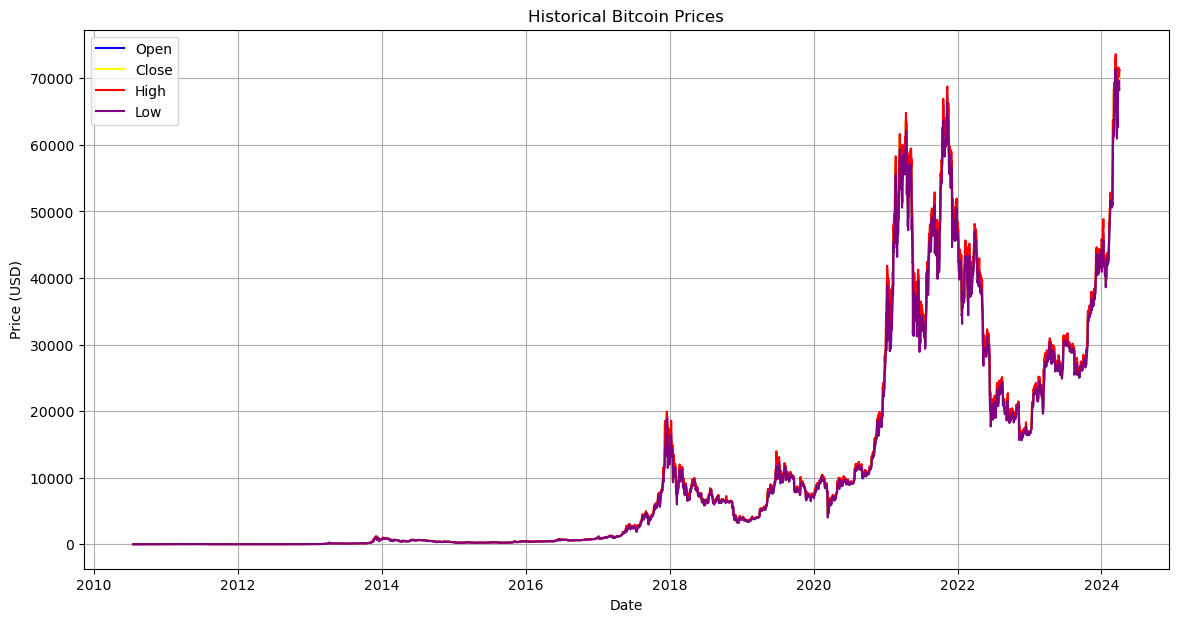

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Open'], label='Open', color='blue')
plt.plot(df.index, df['Close'], label='Close', color='yellow')
plt.plot(df.index, df['High'], label='High', color='red')
plt.plot(df.index, df['Low'], label='Low', color='purple')
plt.title('Historical Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

<u>Bitcoin prices overview</u>

From 2010 to 2017 :
- For the first four years, bitcoin prices were extremely low (fractions of a cent). That's because Bitcoin was in its beginnings. 
- The price remained relatively stable until 2013 when it saw its first significant spike, reaching over 1000 dollars briefly before dropping back down  significantly and remained relatively stagnant, trading mostly between 200 and 500 dollars.
From 2017 to 2024 :
- In 2017 Bitcoin prices increased significantly. Indeed, it started the year round 400 dollar and reached all-time high of nearly 20,000 dollar at the end of 2017. Bitcoin began to gain mainstream attention during this period which can explain this spike.
- In 2018, the price of Bitcoin dropped below 10,000 dollars and remained relatively volatile throughout the year, ending around 3,800 dollars.But the price remained relatively steady compared to previous years untill 2020, trading mostly between 5,000 dollars and 10,000 dollars. 
- Bitcoin saw another significant price surge in 2021, reaching new all-time highs above 60,000 dollars. However, it experienced considerable volatility throughout the year, with multiple sharp corrections and recoveries.
- For the last 2 years, the price of Bitcoin has remained relatively high, consistently trading above 30,000 dollars for much of the time. However, it has also experienced periods of volatility, influenced by factors such as the Covid-19 crisis, high interest rates set by Central Banks, and a sense of insecurity regarding the market."

#### Let's observe the correlation betwen Bitcoin, prices and volume

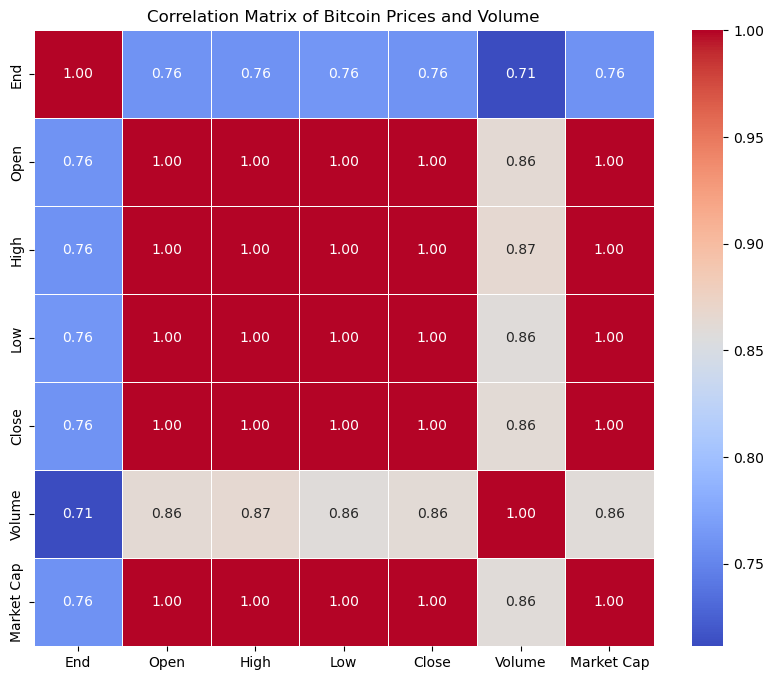

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Bitcoin Prices and Volume')
plt.show()

<u>Heatmap analysis</u>

We can visualize the correlation matrix, which shows the pariwise correlations between our variables : Open, High, Low, Close, Volume and Market Capitalization. 

- Correlation between Open, High, Low and Close :

    There is a strong correlation among these variables. Indeed the correlation coefficient is of 1. This finding is expected because these variables represent Bitcoin prices in our dataset. Instead, we will focus on examining the correlation between high and volume, or market capitalization, to simplify the analysis.


- Correlation between High and Volume :

    There is also a strong positive linear relationship between these two variables. The correlation coefficient of 0.87 indicates a significant positive correlation, suggesting that as Bitcoin prices rise, the volume of coins traded tends to increase as well. This relationship is crucial for understanding market dynamics, as higher trading volumes often accompany significant price movements, indicating heightened investor interest and activity in the Bitcoin market. However, it's essential to  consider other factors such as market sentiment, liquidity, and external events to provide a more comprehensive understanding of the relationship between Bitcoin price and trading volume.


- Correlation between High and Market Capitalization :

    There is a perfect positive linear relationship between market capitalization and the high price of Bitcoin. This means that as the high price of Bitcoin increases, the market capitalization also increases in a perfectly linear way. This suggests a strong and consistent relationship between the two variables, providing valuable insights into the dynamics of Bitcoin's valuation in the market.


- Correlation between Volume and Market Cpitalization :

    The correlation coefficient between these two variables is of 0.86. This indicates a strong positive linear relationship between volume and market capitalization that is to say, when the market capitalization of Bitcoin increases, the trading volume typically increases. This is exepcted because higher market capitalization often attracts more trading activity, as investors may be more inclined to buy or sell larger volumes of Bitcoin.


- Correlation between End and Start and the other variables :

    These two variables exhibit a lower correlation coefficient compared to the others (0.76 and 0.71, respectively). This suggests that the dates have relatively a
    weaker impact on the Bitcoin market compared to the other variables.

C:\Users\emeli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


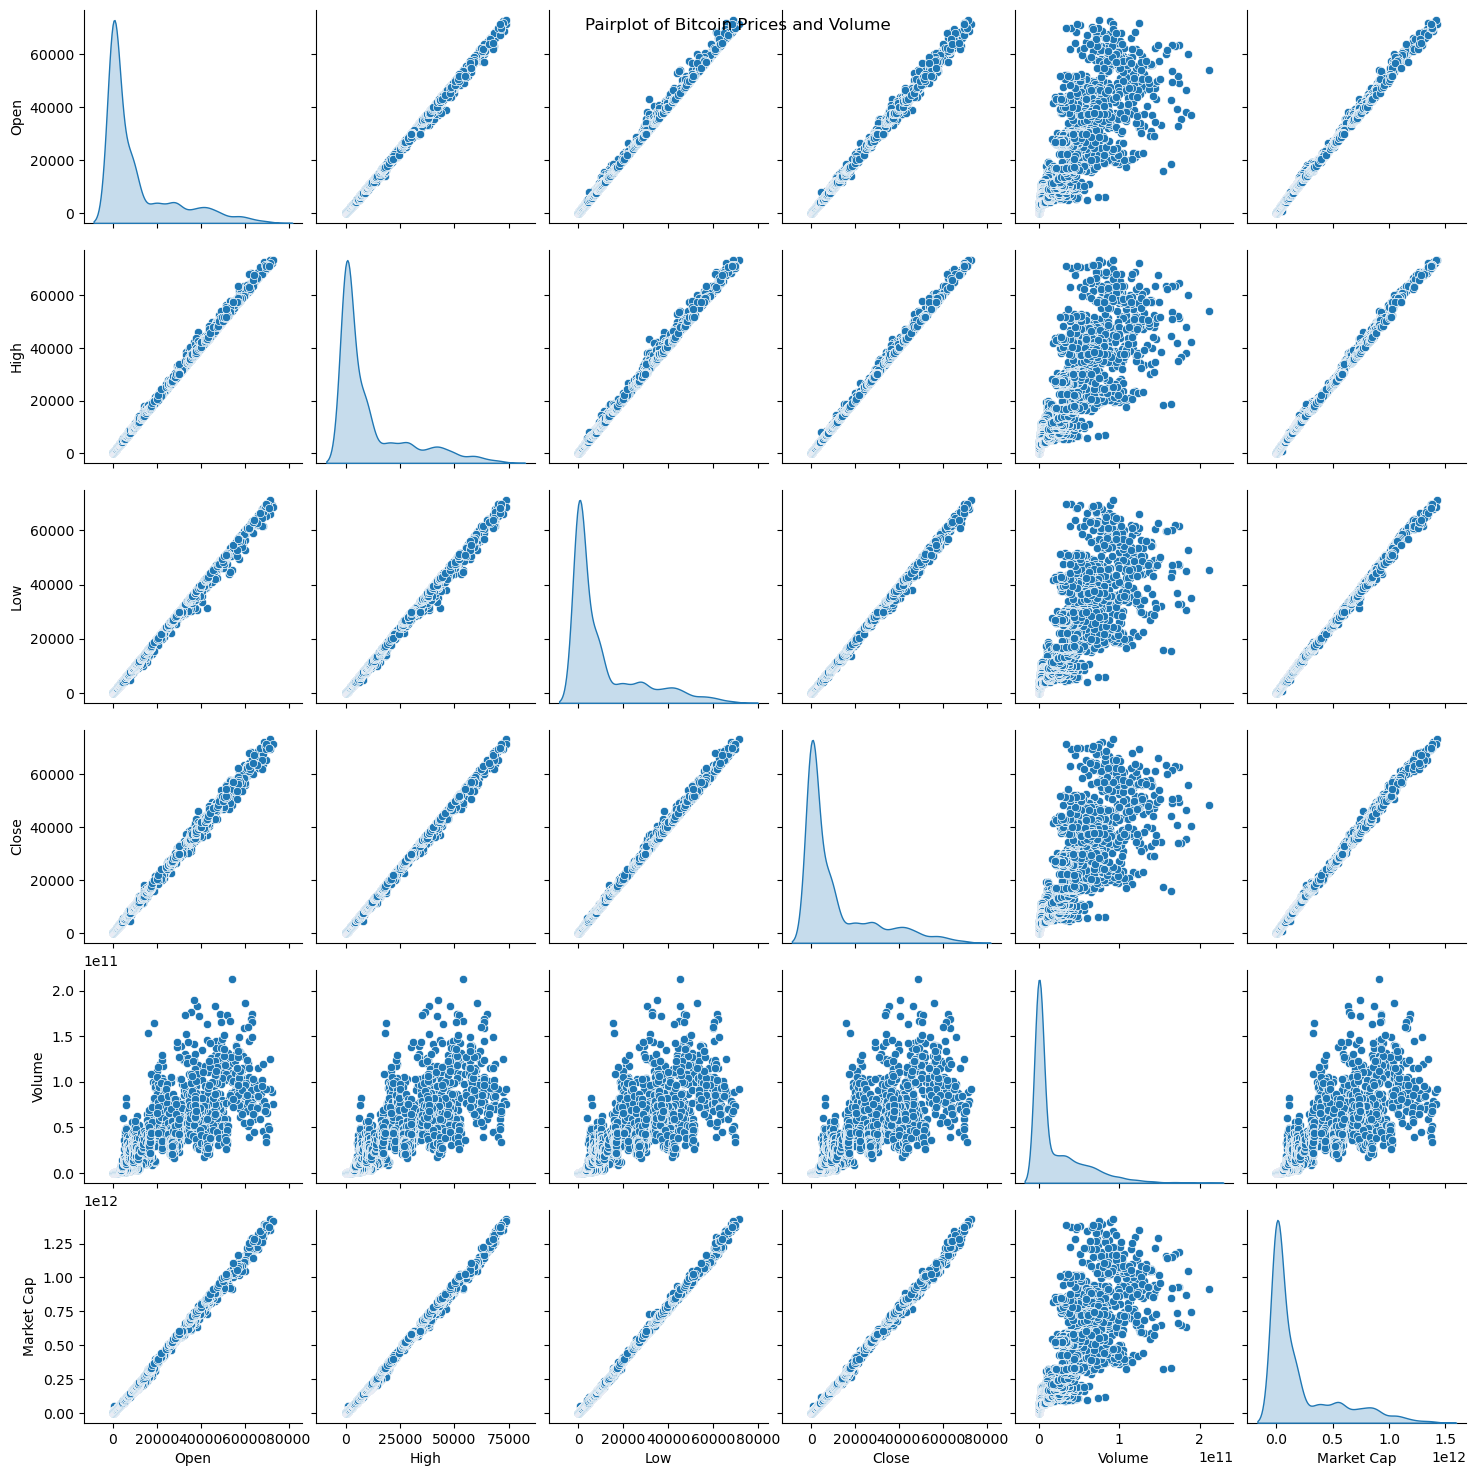

In [11]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']], kind='scatter', diag_kind='kde')
plt.suptitle('Pairplot of Bitcoin Prices and Volume')
plt.show()

<u>Pairpolt of Bitcoin Prices, Volume and Market Capitalization</u>

These scatter plots confirm the patterns that we had before between our variables. There is a strong positive correlation between all of our variables.

#### Let's study the monthly volatility of Bitcoin over time

In [12]:
df = pd.read_csv('bitcoin_2010-07-17_2024-04-02.csv')
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

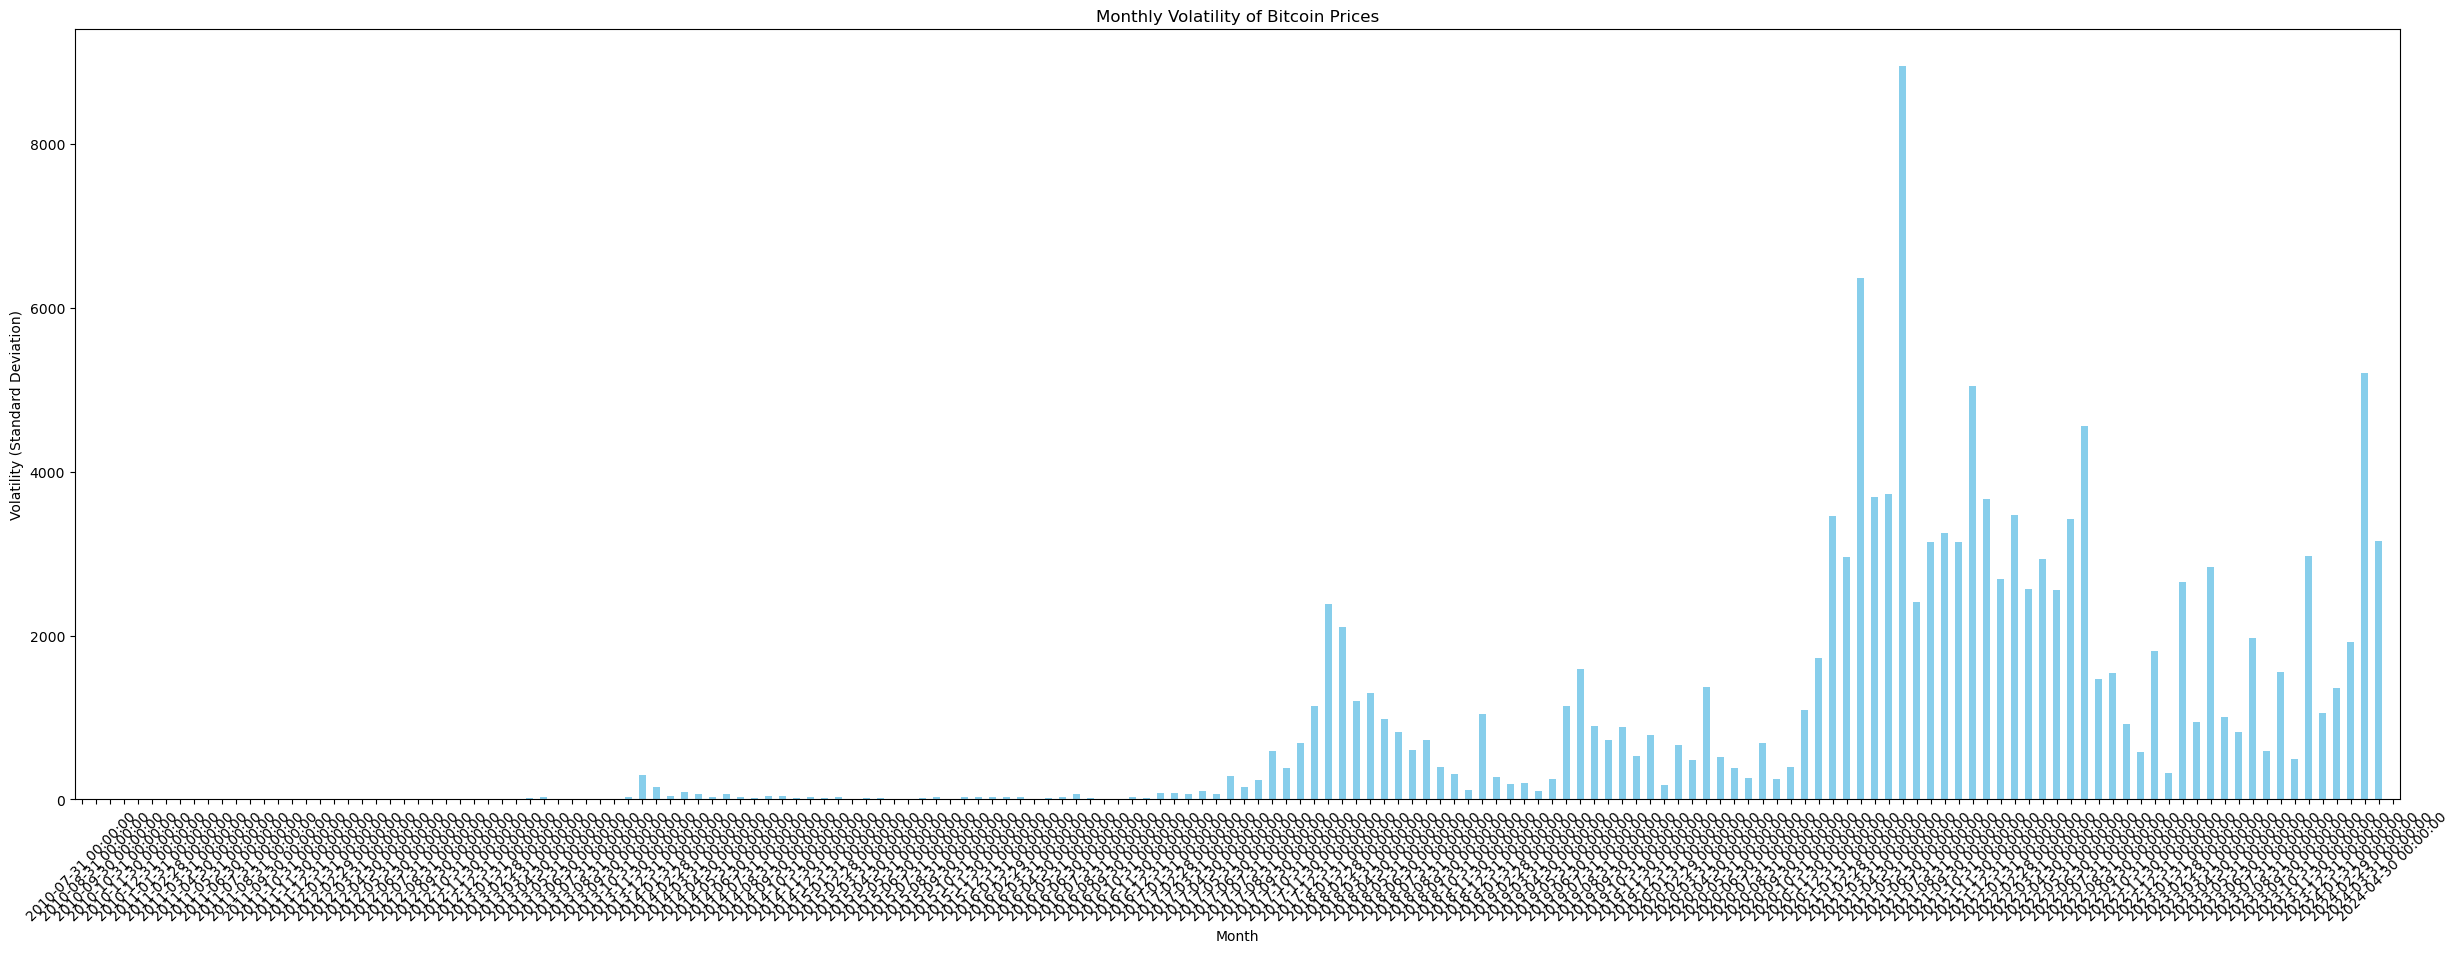

In [13]:
monthly_volatility = df.set_index('Start').resample('M')['Close'].std()
plt.figure(figsize=(30, 10))
monthly_volatility.plot(kind='bar', color='skyblue')
plt.title('Monthly Volatility of Bitcoin Prices')
plt.xlabel('Month')
plt.ylabel('Volatility (Standard Deviation)')
plt.xticks(rotation=45)
plt.show()

<u>Monthly Bitcoin Volatility</u>

Tis bar chart reveals significant volatility in Bitcoin prices, particularly since 2020. However, a notable decrease in volatility was observed during the latter half of 2022. This decrease coincided with the bankruptcy of FTX, a prominent cryptocurrency, which had repercussions on the broader cryptocurrency market. The bankruptcy of FTX not only contributed to a loss of investor confidence but also prompted a reevaluation of the credibility of cryptocurrencies as a whole.. 

However, the initial months of 2023 indicate a resurgence in Bitcoin volatility, demonstrating that this setback did not weaken enthusiasm for long. Despite previous challenges, Bitcoin continues to exhibit its characteristic volatility, suggesting resilience in the face of market fluctuations.

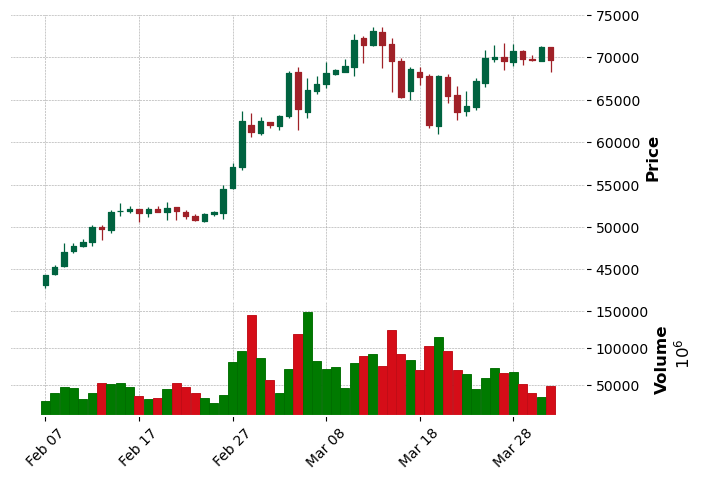

In [69]:
from datetime import datetime, timedelta
df.reset_index(inplace=True)
one_month_ago = datetime.now() - timedelta(days=80)
df_one_month_ago = df[df['Start'] >= one_month_ago]

df_one_month_ago.set_index('Start', inplace=True)

candle_df_one_month = df_one_month_ago[['Open', 'High', 'Low', 'Close', 'Volume']]  

mpf.plot(candle_df_one_month, type='candle', style='charles', volume=True, ylabel='Price', ylabel_lower='Volume')

<u>Candlestick Chart Analysis</u>

Due to the recent surge in Bitcoin prices, reaching an all-time high in February, we will be analyzing the candlestick chart from February 7th to April 2nd.

Up until February 27th, market sentiment appears hesitant. The presence of doji candles and shooting stars suggests uncertainty among investors, making it difficult to predict whether prices will rise or fall.

From February 27th to March 5th, we observe significant momentum candles, indicating a potential continuation of the upward trend. This suggests that it may be a favorable time to consider purchasing coins.

However, on April 1st, a shooting star pattern emerges, potentially signaling a reversal in Bitcoin prices. This is accompanied by a decrease in trading volume, further supporting the notion of a weakening market sentiment.

### III. Prediction of Bitcoin price 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

Now, we aim to determine whether a machine learning model can accurately predict whether the price of Bitcoin will increase or decrease. To achieve this, we create a new column in our dataset to indicate whether, 30 days after a given date, the price of Bitcoin surpasses its current value. If the price is indeed higher, we assign a value of 1 to the corresponding entry. Otherwise, we assign a value of 0.

In [22]:
df = pd.read_csv('bitcoin_2010-07-17_2024-04-02.csv')

df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

df.sort_values(by='Start', inplace=True)

df['Price_Increase_Within_30_Days'] = df['Close'].shift(-30) > df['Close']
df['Price_Increase_Within_30_Days'] = df['Price_Increase_Within_30_Days'].astype(int)

df = df.iloc[:-30]

In [23]:
df

,Start,End,Open,High,Low,Close,Volume,Market Cap,Price_Increase_Within_30_Days
0,2010-07-17,2010-07-18,0.0500,0.0500,0.0500,0.0500,0.000000e+00,0.000000e+00,1
1,2010-07-18,2010-07-19,0.0858,0.0858,0.0858,0.0858,0.000000e+00,0.000000e+00,0
2,2010-07-19,2010-07-20,0.0808,0.0808,0.0808,0.0808,0.000000e+00,0.000000e+00,0
3,2010-07-20,2010-07-21,0.0747,0.0747,0.0747,0.0747,0.000000e+00,0.000000e+00,0
4,2010-07-21,2010-07-22,0.0792,0.0792,0.0792,0.0792,0.000000e+00,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...
4973,2024-02-27,2024-02-28,54560.0100,57501.1400,54463.7300,57029.2400,8.124832e+10,1.109066e+12,1
4974,2024-02-28,2024-02-29,57042.4800,63699.0300,56731.1100,62497.2800,9.665861e+10,1.164353e+12,1
4975,2024-02-29,2024-03-01,62078.0100,63470.4800,60559.3400,61256.0100,1.448088e+11,1.219196e+12,1
4976,2024-03-01,2024-03-02,61140.0400,62936.0000,60791.7900,62481.0700,8.594994e+10,1.214946e+12,1


<u>Logistic Regression</u>

First, we use an elementary model using the logistic regression, splitting our dataset into training and testing sets, and subsequently assessing the model's accuracy. 

In [26]:
X = df[['Open', 'High', 'Low', 'Close', 'Volume']] 
y = df['Price_Increase_Within_30_Days'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = logistic_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5070281124497992


The accuracy of the current model is notably low, indicating its unreliability. To address this limitation, our next step involves testing a more sophisticated model, which I discovered on an internet forum. This model combines gradient boosting with the cross-validation method, offering enhanced predictive capabilities and robustness against overfitting.

In [29]:
gb = GradientBoostingClassifier(learning_rate=0.5)
scores = cross_validate(gb, X_train, y_train,scoring=('accuracy', 'precision','recall'), cv=10)

In [30]:
gb.fit(X_train, y_train)

predictions = gb.predict(X_test) 
accuracy = accuracy_score(y_test,predictions)
print("Accuracy :", accuracy)

Accuracy : 0.7319277108433735


We observe that a more sophisticated model might have the capability to forecast, to some extent, the future behavior of Bitcoin.

### Conclusion :

Bitcoin is known for its high volatility, with price fluctuations that can be significantly larger than traditional assets like stocks or bonds. While volatility can present opportunities for profit, it also increases risk, making Bitcoin less suitable for conservative investors.
While Bitcoin is recognised and accepted in many countries, skepticism persists in some quarters regarding its utility as an asset. Furthermore, the bankruptcy of FTX stressed the challenges Bitcoin faces in establishing itself as a stable currency, exacerbated by its inherent volatility. Despite its growing acceptance, Bitcoin continues to confront obstacles on its path to becoming a universally recognized and reliable form of currency.

Whether Bitcoin is considered reliable as an asset depends on individual perspectives, risk preferences, and investment strategies. Some investors view Bitcoin as a promising investment opportunity with the potential for significant returns, while others remain skeptical due to concerns about volatility, regulatory uncertainty, and technological risks.

In the future, advancements in prediction models may enable us to forecast Bitcoin's future patterns more accurately. This potential development could enhance Bitcoin's reliability as an asset, as investors would have better insights into its price movements and market behavior.